# Setup

## Imports

In [20]:
from vaiutils import path_consts, plot_images, channels_last
from tqdm import tqdm_notebook

In [12]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import MNIST

## Set up data and variables

In [2]:
for k, v in path_consts('Autoencoder', 'MNIST'):
    exec(k + '=v')

In [4]:
batch_size = 64
transform = transforms.Compose([transforms.ToTensor()])
dataset = MNIST(DIR_DATA, transform=transform)
data = DataLoader(dataset, batch_size=batch_size, shuffle=True)

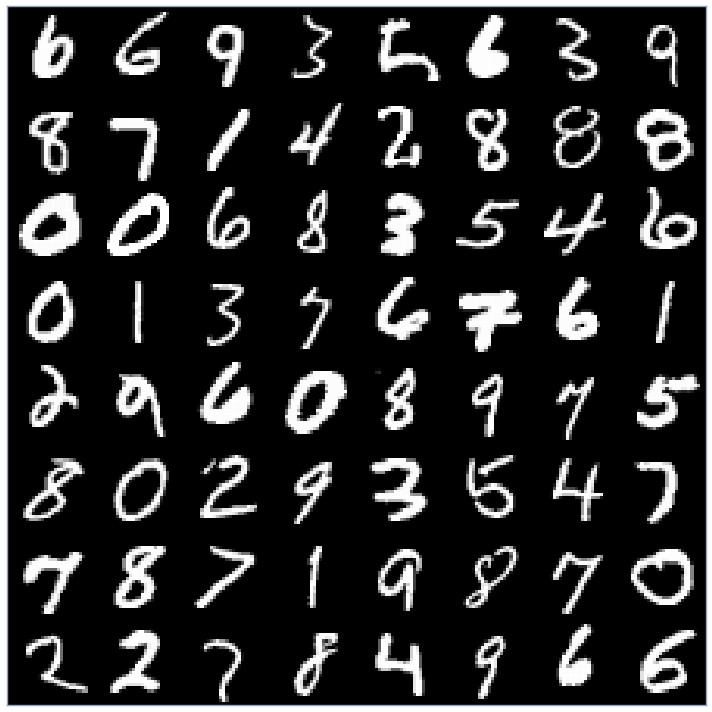

In [19]:
plot_images(channels_last(iter(data).next()[0].cpu().numpy()))

# Create Model

In [139]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 32)

    def forward(self, x):
        x = self.fc1(x.view(-1, 28 * 28 * 1))
        return x

In [140]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(32, 28 * 28 * 1)

    def forward(self, x):
        x = self.fc1(x)
        return F.sigmoid(x.view(-1, 1, 28, 28))

In [148]:
encoder = Encoder().cuda()
decoder = Decoder().cuda()

# Train Model

In [149]:
criterion = nn.MSELoss()
optimizer = optim.Adam(list(encoder.parameters()) +
                       list(decoder.parameters()), lr=1e-2)

In [150]:
history = {'loss': []}


def optimize(epochs=1):
    for epoch in tqdm_notebook(range(epochs)):
        for batch, datum in enumerate(tqdm_notebook(data)):
            x_batch = Variable(datum[0].cuda())

            optimizer.zero_grad()
            z_batch = encoder(x_batch)
            x_gen_batch = decoder(z_batch)
            loss = criterion(x_gen_batch, x_batch)
            loss.backward()
            optimizer.step()

            history['loss'].append(loss.cpu().data.numpy()[0])
            if batch % 400 == 0:
                plot_images(channels_last(x_batch[:5].cpu().data.numpy()))
                plot_images(channels_last(x_gen_batch[:5].cpu().data.numpy()))

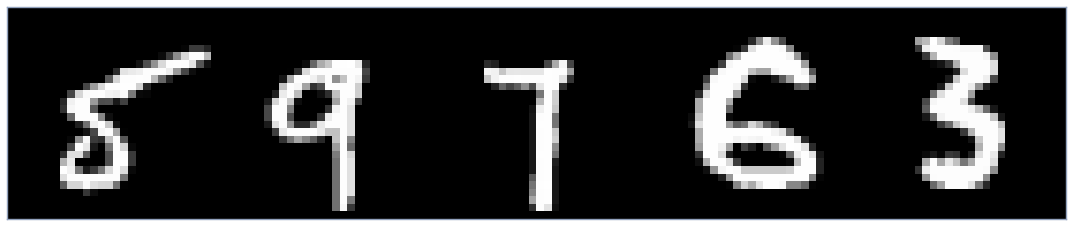

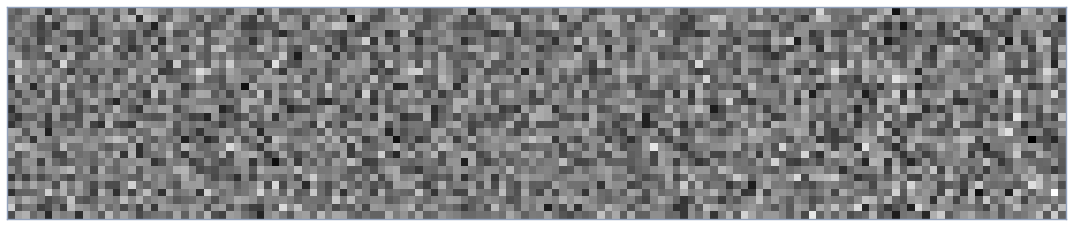

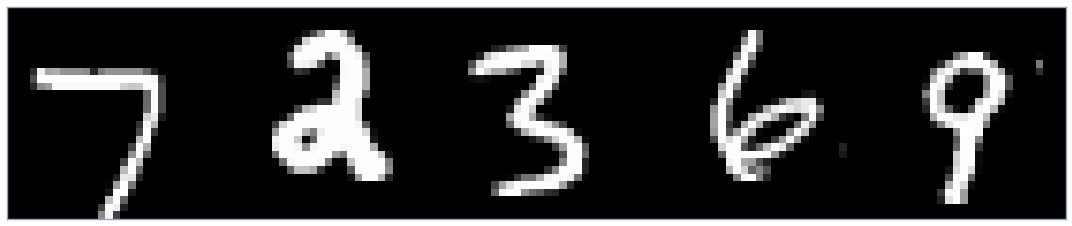

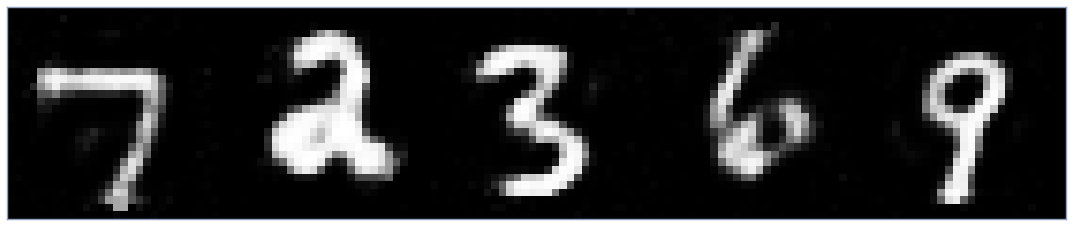

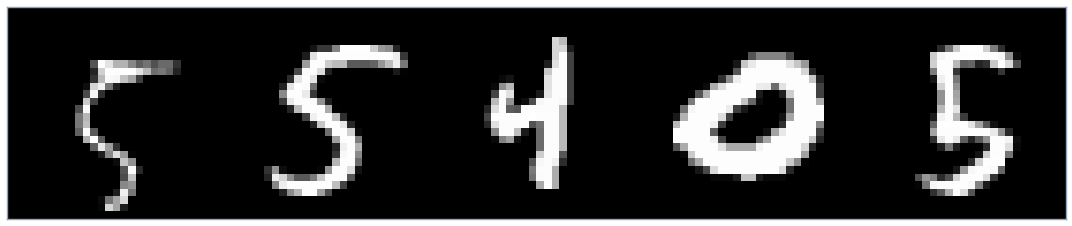

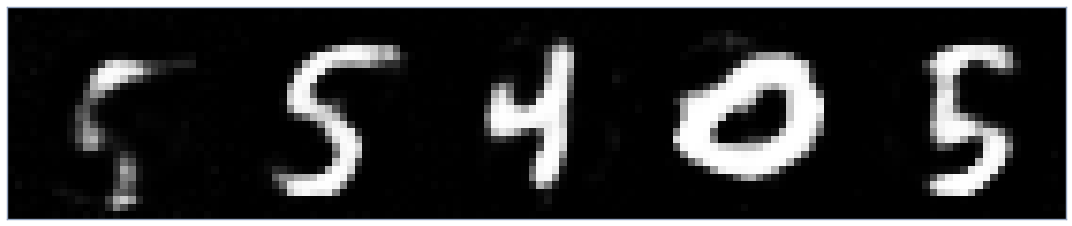

In [151]:
optimize()

([<matplotlib.lines.Line2D at 0x7ff62eb38c88>], 0.011314245)

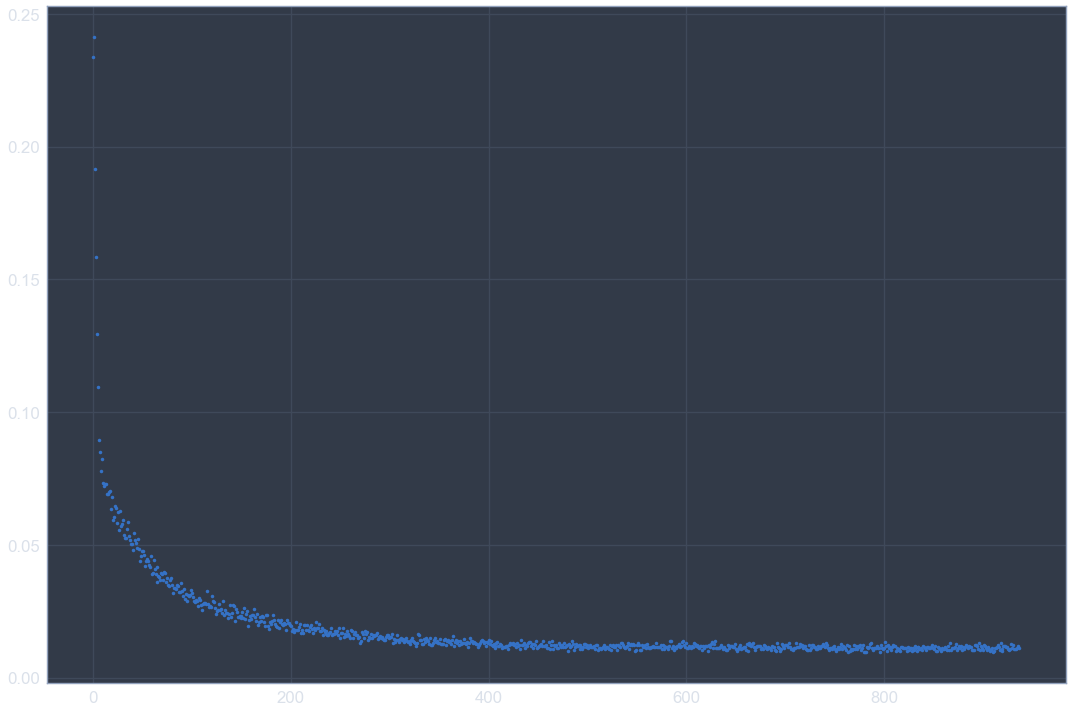

In [152]:
plot(history['loss'], '.'), history['loss'][-1]

# Generate Images (Not really!)

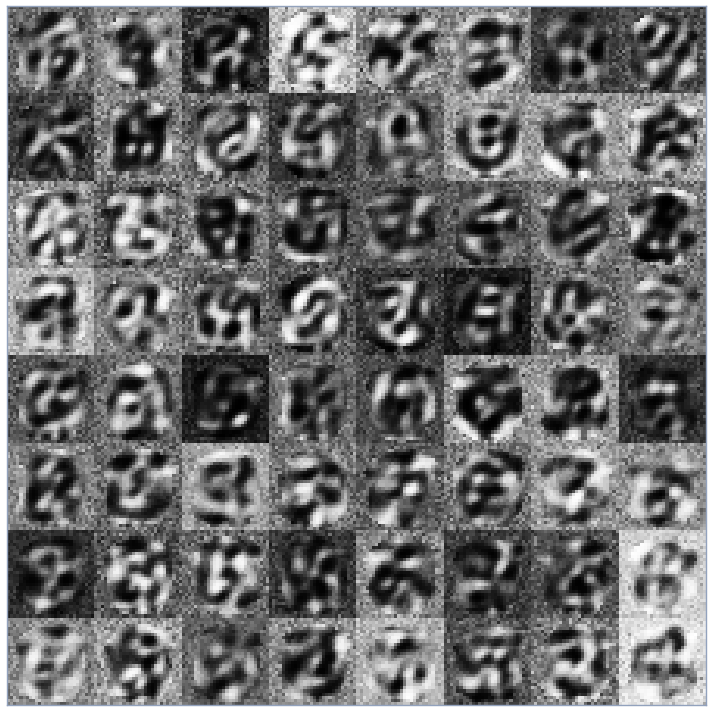

In [154]:
z_rand = torch.randn(64, 32)
gen_imgs = decoder(Variable(z_rand.cuda()))
plot_images(channels_last(gen_imgs.cpu().data.numpy()))